<a href="https://colab.research.google.com/github/aztecus1/Data-analysis-ERP-Nav/blob/main/LSTM_implementation_for_Profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
files.upload()

Saving ANNF.csv to ANNF.csv


{'ANNF.csv': b'format_date,Profit\r\n40909.00,2538.6\r\n40910.00,1653.53835\r\n40911.00,571.2\r\n40912.00,2976.36903\r\n40913.00,234.4\r\n40918.00,1114.6\r\n40920.00,739.2\r\n40921.00,2983.84602\r\n40922.00,3307.0767\r\n40923.00,2176.68\r\n40924.00,369.6\r\n40927.00,277.2\r\n40928.00,1502\r\n40930.00,1331\r\n40932.00,2583.01534\r\n40933.00,856.8\r\n40936.00,0\r\n40938.00,369.6\r\n40940.00,532.4\r\n40942.00,18945.8497\r\n40944.00,4718.2\r\n40945.00,277.2\r\n40946.00,1863.4\r\n40947.00,3581.2\r\n40948.00,856.8\r\n40949.00,2363.4\r\n40950.00,798.1\r\n40952.00,895.8\r\n40955.00,82.8\r\n40956.00,901.8\r\n40958.00,2976.36903\r\n40959.00,104.4\r\n40960.00,2341.1\r\n40964.00,55.2\r\n40966.00,2723.44602\r\n40967.00,1946.61534\r\n40972.00,1331\r\n40973.00,105.5\r\n40975.00,61.9\r\n40980.00,1385.2\r\n40981.00,527.5\r\n40982.00,166.2\r\n40985.00,1428\r\n40988.00,462\r\n40990.00,646.8\r\n40991.00,55.2\r\n40992.00,2645.66136\r\n40993.00,1661.70767\r\n40995.00,2976.36903\r\n40997.00,3373.6\r\n40999.0

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
df = pd.read_csv('ANNF.csv',usecols=[1])

In [ ]:
total=[]
total.append(df.iloc[0]['Profit'])
for i in range(650):
  total.append(df.loc[0:i].Profit.sum())

df['Total']=total
df=df['Total']
df.to_csv("total.csv")
df = pd.read_csv('total.csv',usecols=[1])

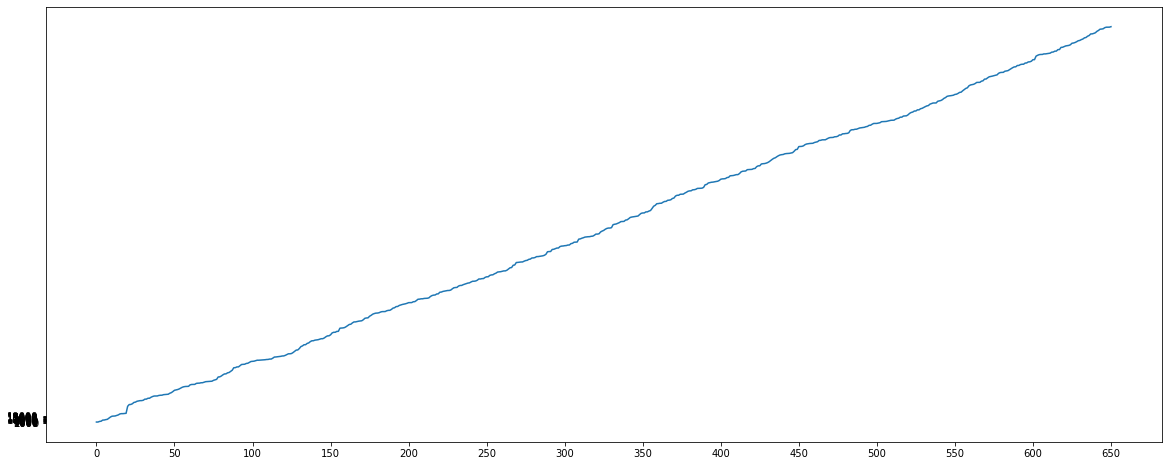

            Total
0    2.538600e+03
1    2.538600e+03
2    4.192138e+03
3    4.763338e+03
4    7.739707e+03
..            ...
646  1.069035e+06
647  1.070329e+06
648  1.070384e+06
649  1.070431e+06
650  1.071716e+06

[651 rows x 1 columns]


In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(df)
plt.yticks(numpy.arange(0, 20000, 1000))
plt.xticks(numpy.arange(0, 700, 50))
plt.show()
print(df)

In [ ]:
dataset = df.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


520 131


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t-1,t-2 and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Model 1
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
516/516 - 20s - loss: 0.0111 - mae: 0.0568
Epoch 2/100
516/516 - 1s - loss: 8.3761e-05 - mae: 0.0077
Epoch 3/100
516/516 - 1s - loss: 5.9467e-05 - mae: 0.0064
Epoch 4/100
516/516 - 1s - loss: 3.7272e-05 - mae: 0.0050
Epoch 5/100
516/516 - 1s - loss: 1.8305e-05 - mae: 0.0034
Epoch 6/100
516/516 - 1s - loss: 9.6573e-06 - mae: 0.0025
Epoch 7/100
516/516 - 1s - loss: 6.5756e-06 - mae: 0.0020
Epoch 8/100
516/516 - 1s - loss: 6.5120e-06 - mae: 0.0020
Epoch 9/100
516/516 - 1s - loss: 8.6099e-06 - mae: 0.0023
Epoch 10/100
516/516 - 1s - loss: 8.4408e-06 - mae: 0.0023
Epoch 11/100
516/516 - 1s - loss: 1.0132e-05 - mae: 0.0025
Epoch 12/100
516/516 - 1s - loss: 9.7455e-06 - mae: 0.0024
Epoch 13/100
516/516 - 1s - loss: 2.0066e-05 - mae: 0.0034
Epoch 14/100
516/516 - 1s - loss: 1.3088e-05 - mae: 0.0027
Epoch 15/100
516/516 - 1s - loss: 1.1682e-05 - mae: 0.0026
Epoch 16/100
516/516 - 1s - loss: 1.6965e-05 - mae: 0.0030
Epoch 17/100
516/516 - 1s - loss: 1.6460e-05 - mae: 0.0030
Epoch 18/

In [ ]:
# Model 2
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
516/516 - 2s - loss: 0.0077 - mae: 0.0433
Epoch 2/100
516/516 - 1s - loss: 6.9442e-05 - mae: 0.0070
Epoch 3/100
516/516 - 1s - loss: 3.8279e-05 - mae: 0.0051
Epoch 4/100
516/516 - 1s - loss: 1.9407e-05 - mae: 0.0035
Epoch 5/100
516/516 - 1s - loss: 7.1201e-06 - mae: 0.0021
Epoch 6/100
516/516 - 1s - loss: 5.8095e-06 - mae: 0.0018
Epoch 7/100
516/516 - 1s - loss: 6.7208e-06 - mae: 0.0020
Epoch 8/100
516/516 - 1s - loss: 6.8327e-06 - mae: 0.0020
Epoch 9/100
516/516 - 1s - loss: 9.9474e-06 - mae: 0.0024
Epoch 10/100
516/516 - 1s - loss: 1.7898e-05 - mae: 0.0031
Epoch 11/100
516/516 - 1s - loss: 1.1792e-05 - mae: 0.0026
Epoch 12/100
516/516 - 1s - loss: 1.0888e-05 - mae: 0.0024
Epoch 13/100
516/516 - 1s - loss: 2.4622e-05 - mae: 0.0037
Epoch 14/100
516/516 - 1s - loss: 2.3065e-05 - mae: 0.0034
Epoch 15/100
516/516 - 1s - loss: 2.4694e-05 - mae: 0.0035
Epoch 16/100
516/516 - 1s - loss: 1.6103e-05 - mae: 0.0030
Epoch 17/100
516/516 - 1s - loss: 1.3072e-05 - mae: 0.0028
Epoch 18/1

In [ ]:
# Model 3
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
516/516 - 3s - loss: 0.0095 - mae: 0.0433
Epoch 2/100
516/516 - 1s - loss: 5.6332e-05 - mae: 0.0062
Epoch 3/100
516/516 - 1s - loss: 3.4131e-05 - mae: 0.0048
Epoch 4/100
516/516 - 1s - loss: 2.0206e-05 - mae: 0.0037
Epoch 5/100
516/516 - 1s - loss: 1.0805e-05 - mae: 0.0026
Epoch 6/100
516/516 - 1s - loss: 6.8098e-06 - mae: 0.0020
Epoch 7/100
516/516 - 1s - loss: 7.7735e-06 - mae: 0.0021
Epoch 8/100
516/516 - 1s - loss: 9.8382e-06 - mae: 0.0024
Epoch 9/100
516/516 - 1s - loss: 1.1485e-05 - mae: 0.0025
Epoch 10/100
516/516 - 1s - loss: 1.8181e-05 - mae: 0.0032
Epoch 11/100
516/516 - 1s - loss: 4.8481e-05 - mae: 0.0046
Epoch 12/100
516/516 - 1s - loss: 1.1913e-05 - mae: 0.0026
Epoch 13/100
516/516 - 1s - loss: 4.2330e-05 - mae: 0.0046
Epoch 14/100
516/516 - 1s - loss: 1.9377e-05 - mae: 0.0032
Epoch 15/100
516/516 - 1s - loss: 1.6697e-05 - mae: 0.0030
Epoch 16/100
516/516 - 1s - loss: 2.4282e-05 - mae: 0.0036
Epoch 17/100
516/516 - 1s - loss: 1.3992e-05 - mae: 0.0028
Epoch 18/1

In [ ]:
model.evaluate(trainX,trainY)

14/14 [==============================] - 0s 2ms/step - loss: 4.9057e-06 - mae: 0.0017


[4.905657533527119e-06, 0.0017133975634351373]

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
from sklearn.metrics import mean_absolute_error
r2 = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Test Score: %.2f MAE' % (r2))

Train Score: 2969.83 RMSE
Test Score: 12010.42 RMSE
Test Score: 2235.86 MAE


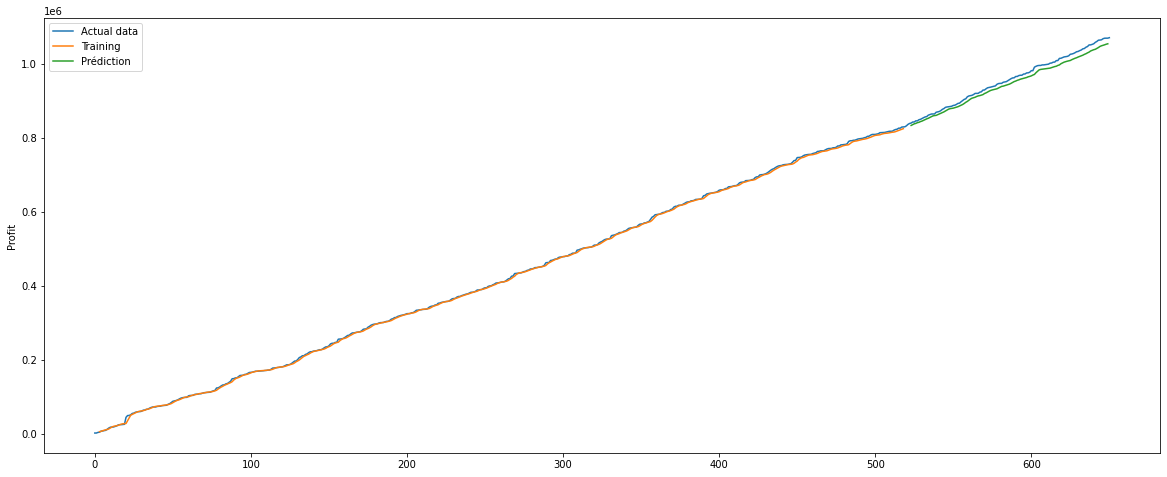

In [ ]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel("Profit")
plt.legend(['Actual data','Training','Prédiction'])
plt.show()
